In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import random

random.seed(45) #set seed for reproducible results

In [2]:
#set up the connection to google drive and import the datasets
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/fwe458/datasets/'
fname = filedir + "assessments.csv"
iucn_rl = pd.read_csv(fname)

fname = filedir + "pantheria.txt"
pantheria = pd.read_csv(fname, sep='\t') #read txt file

Mounted at /content/drive


In [3]:
#select relevant columns from the iucn redlist data
iucn = iucn_rl[['scientificName', "redlistCategory"]]

df = pd.merge(iucn, pantheria, left_on='scientificName', right_on='MSW93_Binomial', how='inner') #merge dataframes into one
df = df.drop(columns=['MSW93_Binomial'])

#select feature categories
df = df[['scientificName', "redlistCategory",
       '5-1_AdultBodyMass_g', '6-1_DietBreadth', '12-1_HabitatBreadth',
       '15-1_LitterSize', '16-1_LittersPerYear', '10-2_SocialGrpSize',
        '6-2_TrophicLevel']]

df = df.replace([-999, -999.0], np.nan) #missing values were marked as -999; switch to NaN
df=df.dropna() #remove missing values

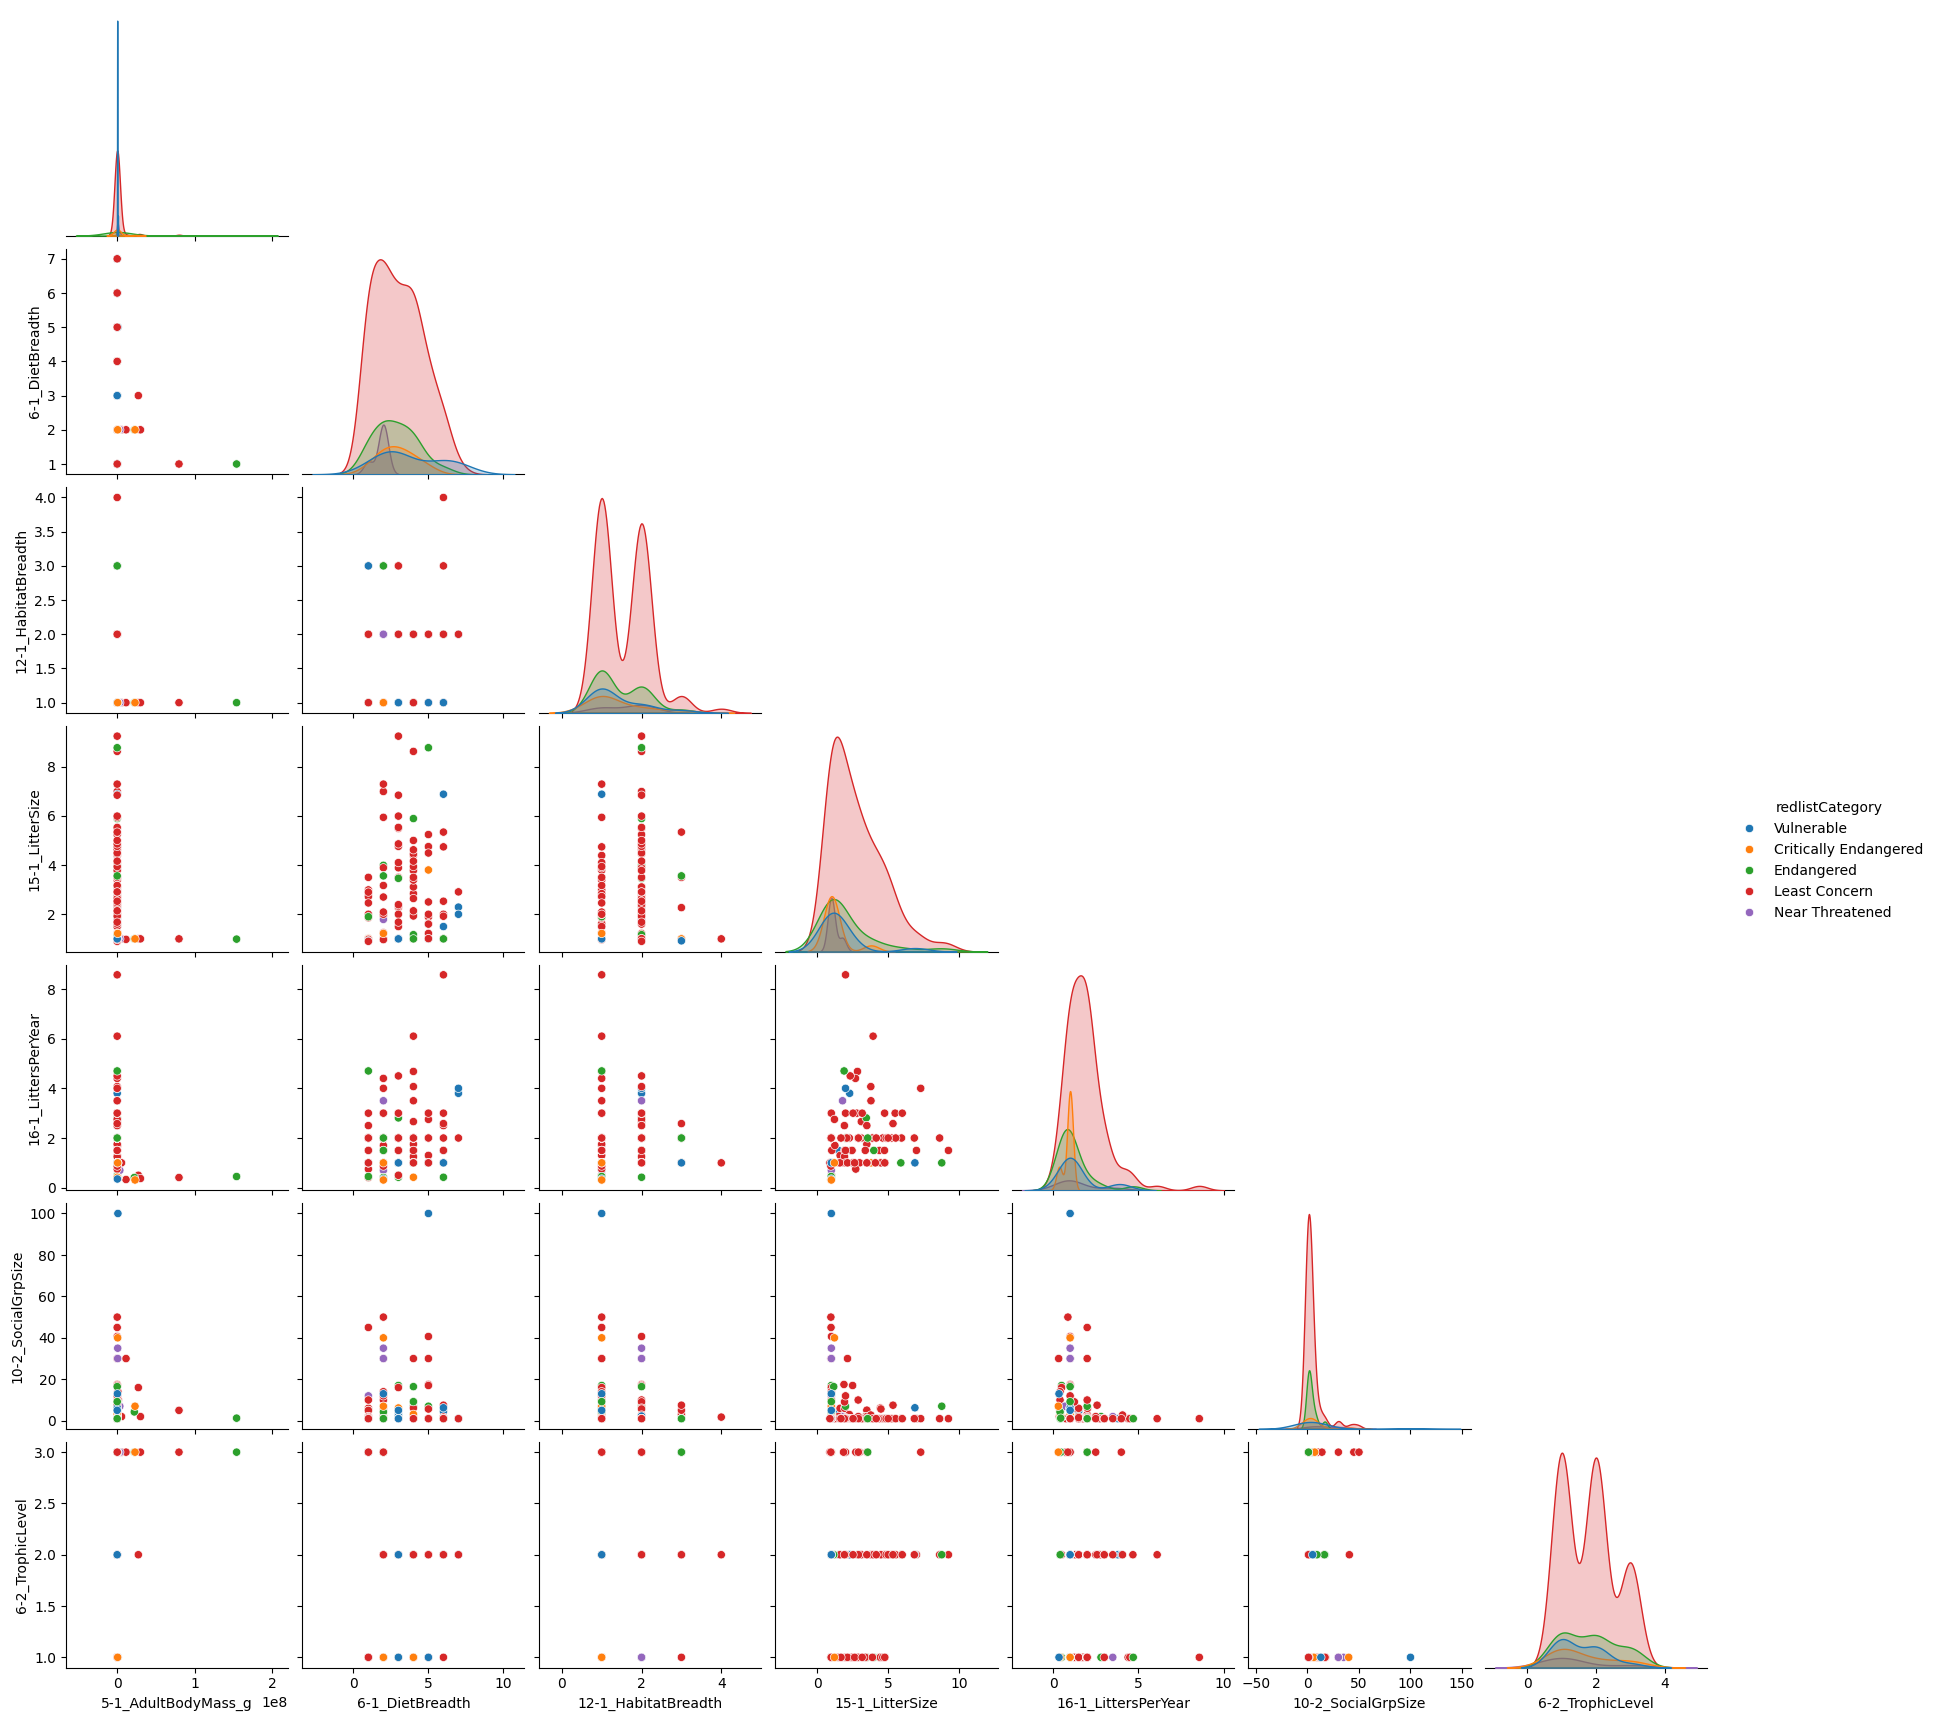

In [4]:
#identify the relevant columns for the pairplot
plot_columns = ['scientificName', "redlistCategory",
       '5-1_AdultBodyMass_g', '6-1_DietBreadth', '12-1_HabitatBreadth',
       '15-1_LitterSize', '16-1_LittersPerYear', '10-2_SocialGrpSize',
        '6-2_TrophicLevel']

#create a subset of the data of only the columns we want
pairplot_data = df[plot_columns]

#create the pairplot
sns.pairplot(pairplot_data, hue="redlistCategory", corner=True)
plt.show()

In [5]:
#define features and y value
feature_cols = ['5-1_AdultBodyMass_g', '6-1_DietBreadth', '12-1_HabitatBreadth',
       '15-1_LitterSize', '16-1_LittersPerYear', '10-2_SocialGrpSize',
        '6-2_TrophicLevel']
X = df[feature_cols]
y = df['redlistCategory']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#use average=weighted because categories in y are not evenly represented
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6451612903225806
Precision: 0.5785413744740533
Recall: 0.6451612903225806
F1 score: 0.6095517385839967


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7096774193548387
Precision: 0.6387096774193549
Recall: 0.7096774193548387
F1 score: 0.6664796633941094


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


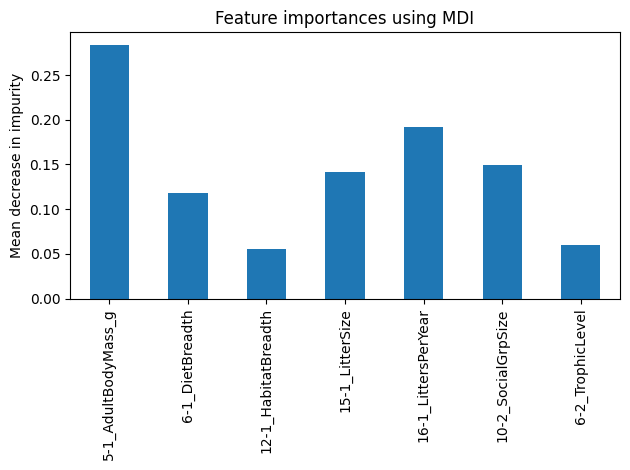

In [7]:
importances = clf.feature_importances_ #extract feature importances from random forest classifier
importances

feature_names = ['5-1_AdultBodyMass_g', '6-1_DietBreadth', '12-1_HabitatBreadth',
       '15-1_LitterSize', '16-1_LittersPerYear', '10-2_SocialGrpSize',
        '6-2_TrophicLevel']
forest_importances = pd.Series(importances, index=feature_names)

#create plot
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [8]:
#create SVM with RBF kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train, y_train) #fit it to the training data
y_pred = svm_rbf.predict(X_test) #predict y values using the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6774193548387096
Precision: 0.4588969823100936
Recall: 0.6774193548387096
F1 score: 0.5471464019851118


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
#create SVM with polynomial kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

svm_poly = SVC(kernel='poly', random_state=0)
svm_poly.fit(X_train, y_train) #fit it to the training data
y_pred_poly = svm_poly.predict(X_test) #predict y values using the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_poly))
print("Precision:",metrics.precision_score(y_test, y_pred_poly, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred_poly, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred_poly, average='weighted'))

Accuracy: 0.6774193548387096
Precision: 0.4588969823100936
Recall: 0.6774193548387096
F1 score: 0.5471464019851118


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42) #split the dataset into training and testing

knn = KNeighborsClassifier(n_neighbors = 3) #define knn classifier using 3 nearest neighbors
knn.fit(Xtrain, ytrain) #fit the model
y_pred_knn = knn.predict(Xtest) #predict values

print("Accuracy:",metrics.accuracy_score(ytest, y_pred_knn))
print("Precision:",metrics.precision_score(ytest, y_pred_knn, average='weighted'))
print("Recall:",metrics.recall_score(ytest, y_pred_knn, average='weighted'))
print("F1 score:", metrics.f1_score(ytest, y_pred_knn, average='weighted'))

Accuracy: 0.7096774193548387
Precision: 0.7712609970674487
Recall: 0.7096774193548387
F1 score: 0.7347670250896057


In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42) #split the dataset into training and testing

knn = KNeighborsClassifier(n_neighbors = 5) #define knn classifier using 5 nearest neighbors
knn.fit(Xtrain, ytrain) #fit the model
y_pred_knn = knn.predict(Xtest) #predict values

print("Accuracy:",metrics.accuracy_score(ytest, y_pred_knn))
print("Precision:",metrics.precision_score(ytest, y_pred_knn, average='weighted'))
print("Recall:",metrics.recall_score(ytest, y_pred_knn, average='weighted'))
print("F1 score:", metrics.f1_score(ytest, y_pred_knn, average='weighted'))

Accuracy: 0.7419354838709677
Precision: 0.6943548387096774
Recall: 0.7419354838709677
F1 score: 0.7136974213158153


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
